In [1]:
import Pkg; Pkg.add(["Plots", "Interact"]);

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Project.toml`
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Manifest.toml`


In [2]:
const STATIC_LECTURE = false;

In [3]:
function draw(plt)
    if STATIC_LECTURE
        filename = Base.Filesystem.tempname() * ".png"
        savefig(filename)
        return display("image/png", read(filename))
    else
        return plt
    end
end

draw (generic function with 1 method)

In [4]:
using LinearAlgebra;
using Plots; default(l=2, size=(900,550), label=false);
using Interact;

imshow(x) = heatmap(x
    , aspect_ratio=:equal
    , framestyle=:none
    , yflip=true
    , c=:diverging_gwv_55_95_c39_n256
    , clim=if maximum(abs.(x)) > 1.e-12 (-maximum(abs.(x)),maximum(abs.(x))) else (-1,1) end
    , size=(500,500)
)

WebIO._IJuliaInit()

imshow (generic function with 1 method)

### Warmup

1. If you have not already, install julia: <https://julialang.org/downloads>

2. Run `julia` to open the julia [REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop)

```
   _       _ _(_)_     |  Documentation: https://docs.julialang.org
  (_)     | (_) (_)    |
   _ _   _| |_  __ _   |  Type "?" for help, "]?" for Pkg help.
  | | | | | | |/ _` |  |
  | | |_| | | | (_| |  |  Version 1.7.0 (2021-11-30)
 _/ |\__'_|_|_|\__'_|  |  
|__/                   |

julia> 
```

3. In julia, you can install [IJulia](https://juliapackages.com/p/ijulia):

```julia
julia> import Pkg;
julia> Pkg.add("IJulia")
```

4. Test it:

```julia
julia> using IJulia
julia> notebook()
```

# Projectors and the QR Factorization

**1. Projectors and Complementary Projectors**

**2. Orthogonal Projectors**

**3. Projection with an Orthogonal vs. Arbitrary Basis**

**4. QR Factorization: Introduction**

**5. QR by Projections**

## Projectors

A _projector_ is a matrix $P$ that satisfies

$$P^2 = P.$$

## $P^2 = P$

- $P$ must be square

- As an operator, _idempotent_:

$$P^2 x = Px$$

- If $(\lambda, v)$ is an eigenpair?

$$ P^2 v = P v \quad \Leftrightarrow \quad \lambda^2 v = \lambda v
\quad \Leftrightarrow \quad \lambda(\lambda - 1) = 0 
\quad \Leftrightarrow \quad \lambda \in \{0,1\}$$

- $\lambda = 1$? If and only if $v \in \mathrm{range}(P)$

$$ P^2 v = P v  \quad \Leftrightarrow \quad P (\lambda v) = \lambda v
\quad \Leftrightarrow \quad P v = v $$

### Intuition: "projected" like a shadow on a wall



### Shifting the shadow to the origin

Shows $(I - P)v \in \mathrm{null}(P)$ for every $v$



(Algebraically: $P(I - P)v = Pv - P^2 v = Pv - Pv = 0$.)

### Complementary Projectors

If $P$ is a projector, $I - P$ is also a projector, the _complementary projector_:

$$(I - P)^2 = I - 2 P + P^2 = I - 2 P + P = I - P.$$

### The range of one is the nullspace of the other

$$\mathrm{null}(P) = \mathrm{range}(I - P), \quad \mathrm{null}(I-P) = \mathrm{range}(P)$$



> A projector separates $\mathbb{C}^m$ into two spaces.

In [5]:
function plot_projections(x, y, θ, ϕ)
    scale = 1.1 * max(abs(x), abs(y))
    u = [cos(θ), sin(θ)]
    v = [-sin(ϕ), cos(ϕ)]
    d = v'*u
    scale = 1.1
    p = plot(ylim = (-scale, scale)
        , xlim = (-1.618*scale, 1.618*scale)
        , framestyle = :origin
        , aspect_ratio = :equal
    )
    plot!(p, [0,x], [0,y], l = :green, text = ["", "x"])
    if (abs(d) > 100 * eps(Float64))
        P = u*v' / d
        Px, Py = P * [x, y]
        plot!(p, [0, Px], [0, Py]
            , color = :blue
            , text = ["", "Px"]
            )
        ImPx, ImPy = (I - P) * [x, y]
        plot!(p, [0, ImPx], [0, ImPy]
            , color = :orange
            , text = ["", "(I-P)x"]
            )
        plot!(p, [ImPx, x], [ImPy, y]
            , l = (1, :blue, :dot)
            )
        plot!(p, [Px, x], [Py, y]
            , l = (1, :orange, :dot)
            )
    end
    function plot_axis!(plt, angle)
        c = cos(angle)
        s = sin(angle)
        m = max(abs(x), abs(y))
        c *= scale / m
        s *= scale / m
        plot!(plt, [-c,c], [-s,s]
            , line = (1, :dash, :black)
        )
        return [[-x,x], [-y,y]]
    end
    plot_axis!(p, θ)
    plot_axis!(p, ϕ)
    return p
end;

In [6]:
if STATIC_LECTURE
    draw(plot_projections(1.0,1.0,-1.0,0.1))
else
    theta=widget(-2π:0.05π:2π, value=-1.0, label="θ")
    phi=widget(-2π:0.05π:2π, value=0.1, label="ϕ")
    x=widget(-1.0:0.1:1.0, value=1.0, label="x")
    y=widget(-1.0:0.1:1.0, value=1.0, label="y")
    iplot = map(plot_projections,x,y,theta,phi)
    vbox(hbox(theta,phi,x,y),iplot)
end

(div { style=Dict("display" => "flex", "flex-direction" => "column") }
  (div { style=Dict("display" => "flex", "flex-direction" => "row") }
    Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 81, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
35, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/tisaac/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/tisaac/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/tisaac/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/home/tisaac/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/home/tisaac/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007ff9e05492c0, Task (runnable) @0x00007ff9e05492c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-6.28319\",\"-6.12611\",\"-5.96903\",\"-5.81195\",\"-5.65487\",\"-5.49779\",\"-5.34071\",\"-5.18363\",\"-5.02655\",\"-4.86947\",\"-4.71239\",\"-4.55531\",\"-4.39823\",\"-4.24

### Exercise

Given vectors $u$ and $v$, what choice of $\alpha$ makes

$$ P = \alpha u v^* $$

a projector?

## Orthogonal Projectors

A projector $P$ is an _orthogonal projector_ if

$$ \mathrm{range}(P) \perp \mathrm{range}(I-P). $$

($S \perp T$: every vector in $S$ or orthogonal to every vector in $T$.)

We mostly use orthogonal projectors: we call non-orthogonal projectors _oblique projectors_.

### Algebraic definition of orthogonal projector

A projector $P$ is orthogonal if and only if

$$P = P^*.$$

### Orthogonal projector $\neq$ orthogonal AKA unitary

**Orthogonal Projector**

$$ P = P^2 $$

$$ P = P^* $$

**Orthogonal / Unitary**

$$ P P^* = I $$

$$ P^* P = I $$

Only one matrix is both...

$$I$$

The only full-rank projector; the only idempotent orthogonal matrix.

### The definitions are equivalent

**T&B Theorem 6.1.** If $P$ is a projector, then $P = P^*$ if and only if $\mathrm{range}(P) \perp \mathrm{range}(I-P)$.

_Proof._

$\Rightarrow$: If $P = P^*$, then

$$(Px)^*((I - P)y) = x^*(P^*(I-P) y) = x^* (P(I-P) y) = x^* 0 = 0.$$

$\Leftarrow$: If $\mathrm{range}(P) \perp \mathrm{range}(I-P)$, then

$$
(Px)^* y = (Px)^*(Py + (I-P)y) = (Px)^*Py + \underbrace{(Px)^*(I-P)y}_{0} = x^*(P^*P)y
$$

Therefore $$P^* = \underbrace{P^* P}_{\text{(hermitian)}}.$$

### Exercise

**T&B Exercise 6.1.** If $P$ is an orthogonal projector, then $I - 2P$ is unitary.

## Projection with an orthonormal basis

**Theorem.** Let $P \in \mathbb{C}^{m\times m}$ be an orthogonal projector with rank $n \leq m$.  Let the columns of $\hat Q\in\mathbb{C}^{m \times n}$ form an orthonormal basis of $\mathrm{range}(P)$.  Then

$$P = \hat Q \hat Q^*.$$

_Proof._ $P$ is defined by $Pv = v$ for all $v\in \mathrm{range}(P)$ and $Pv = 0$ for all $v \perp \mathrm{range}(P)$.

$\hat Q \hat Q^*$ has these properties, so they are equal.

The choice of orthonormal basis of $\mathrm{range}(P)$ doesn't matter.

If the columns of $\hat Q$ are orthonormal, and the columns of $\hat W$ are orthonormal and span the same subspace,

$$\hat Q \hat Q^* = \hat W \hat W^*.$$

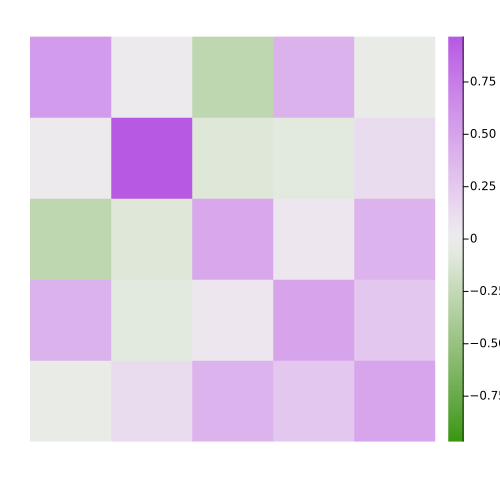

In [7]:
m = 5; n = 3;
# n random orthonormal columns
Q̂ = qr(rand(m, n)).Q[:,1:n];
P = Q̂ * Q̂';
draw(imshow(P))

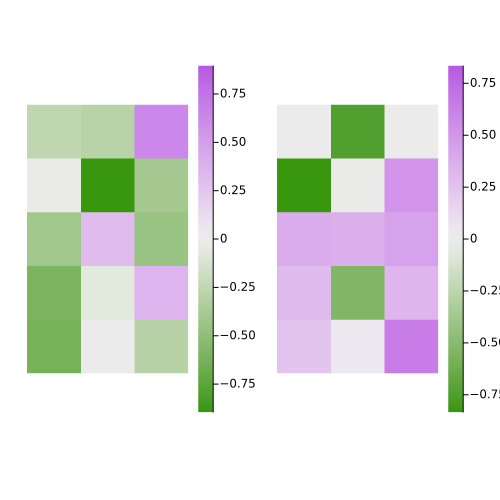

In [8]:
# Compute another basis for range(P) via SVD
U, σ, V = svd(P)
Ŵ = U[:,1:3]
# Q̂ ≠ Ŵ ...
draw(plot(imshow(Q̂),imshow(Ŵ),layout=(1,2)))

In [9]:
norm(P - Ŵ * Ŵ') # ... but Q*Q' = P = W * W'

7.605491458173348e-16

Like an outer product, if $m \ll n$, it is better to store $\hat{Q}$ than to store $P$.

(Or if $(m -n) \ll n$, store the complement $\hat{Q}^c$ that spans $\mathrm{range}(I-P)$.)

### Special case: projection onto span of one vector

If $u$ is a unit vector, the projector onto $\mathrm{span}\{u\}$ is $$P_u = u u^*.$$

The complementary projector is $$P_{\perp u} = I - u u^*.$$

($P_{\perp u} v$ "removes the $u$ component of $v$".)

For an arbitrary vector $a$, we don't have to normalize before defining the orthogonal projectors:

$$P_a = \frac{a a^*}{a^* a}, \quad P_{\perp a} = I - \frac{a a^*}{a^* a}.$$

### Projection with an arbitirary basis

The case is the same for larger subspaces: given $\hat{A}$ with linearly independent columns that span $\mathrm{range}(P)$,

$$P_{\hat{A}} = \hat{A} (\hat{A}^* \hat{A})^{-1} \hat{A}^*$$

$$P_{\perp \hat{A}} = I - \hat{A} (\hat{A}^* \hat{A})^{-1} \hat{A}^*.$$

(Notice symmetry of $P$ and all values in $P \leq 1$.)

Projector error 6.324369763045434e-16
Range error 1.1359320389263482e-15
Hermitian error 3.563326396989262e-16


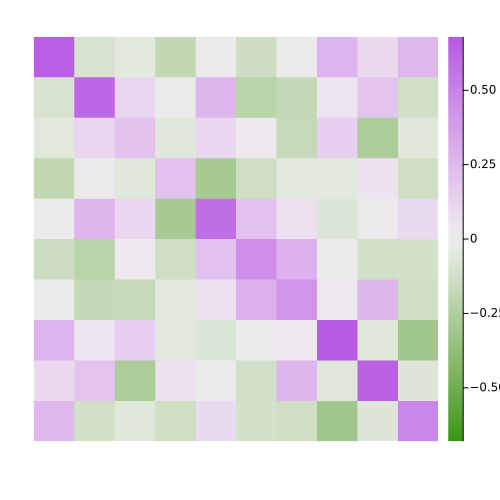

In [10]:
m = 10; n = 5;

Â = randn(m, n)

P = (Â / (Â' * Â)) * Â' # apply inverse on right
# P = Â ((Â' * Â) \ A') # apply inverse on left
println("Projector error $(norm(P - P*P, 2))")
println("Range error $(norm((I-P)*Â, 2))")
println("Hermitian error $(norm(P - P', 2))")
draw(imshow(P))

### What about oblique projectors?

Let projector $P$ have rank $n$, let $\hat{A} \in \mathbb{C}^{m \times n}$ have columns that span $\mathrm{range}(A)$, 
and let $\hat{B} \in \mathbb{C}^{m \times (m-n)}$ span $\mathrm{null}(P)$.

Define $C = [\hat{A} | \hat{B}]$, which is necessarily nonsingular.

Let $\hat{Z}$ be the first $n$ rows of $C^{-1}$.

$$P = \hat{A} \hat{Z}.$$

(Notice $P$ is not symmetric and can have values $> 1$.)

Projector error 1.8786072129047354e-15
Range error 1.6256983979710334e-15
Nullspace error 3.2854248605108422e-15


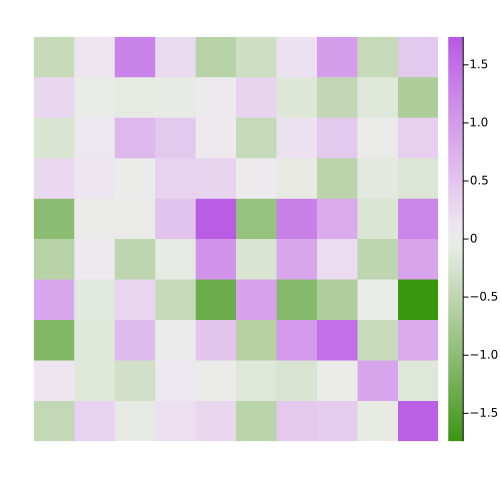

In [11]:
m = 10; n = 5;

Â = randn(m, n)
B̂ = randn(m, m - n)

C = [Â B̂]

Z = C^-1
Ẑ = Z[1:n,:]

P = Â * Ẑ;
println("Projector error $(norm(P - P*P, 2))")
println("Range error $(norm((I-P)*Â, 2))")
println("Nullspace error $(norm(P*B̂, 2))")
draw(imshow(P))

### Notes for HW2, problem 1

Proving ($P$ is nonzero orthogonal projector) $\Rightarrow$ ($\|P\|_2 = 1$): straightforward application of definitions.

Proving ($\|P\|_2 = 1$) $\Rightarrow$ ($P$ is a nonzero orthogonal projector): Suppose $P$ is oblique.  Let $\tilde{P}$ be an orthogonal projector with the same nullspace, and suppose $v \in \mathrm{range}(\tilde{P})$.  In the diagram it is clear that
$\|Pv\|_2 > \|v\|_2.$  Use the definitions and the Pythagorean theorem to show this is always the case.



## QR Factorization

> One algorithmic idea in numerical linear algebra is more important than all the others: QR factorization.

### Want bases for successive (nested) spaces spanned by the columns of $A$

$$
\mathrm{span}\{a_1\} \subseteq
\mathrm{span}\{a_1, a_2\} \subseteq
\mathrm{span}\{a_1, a_2, a_3\} \subseteq \dots
$$

### Use nested orthogonal bases

Given $A \in \mathbb{C}^{m \times n}$ ($m \geq n$) that is _full rank_, want to find orthonormal vectors $\{q_1, \dots, q_n\}$
such that

$$
\mathrm{span}\{q_1, \dots, q_j\} =
\mathrm{span}\{a_1, \dots, a_j\}, \quad j = 1, \dots, n
$$

### This is a triangular relationship

$$
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
a_1 & a_2 & \dots & a_n \\
& & & \\
& & &
\end{array}
\right]
=
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
q_1 & q_2 & \dots & q_n \\
& & & \\
& & &
\end{array}
\right]
\begin{bmatrix}
r_{11} & r_{12} & \dots & r_{1n} \\
       & r_{22} & & r_{2n} \\
       &        & \ddots & \vdots \\
                & & & r_{nn}
\end{bmatrix}.
$$

### As a matrix equation: the Reduced QR Factorization of $A$

$$ A = \hat{Q} \hat R,$$

$\hat{Q} \in \mathbb{C}^{m \times n}$ with orthonormal columns, $\hat R \in \mathbb{R}^{n \times n}$ upper triangular.

### Full QR Factorization: Expand $\hat{Q}$ to a unitary matrix

The extra columns added to $\hat{Q}$ are
orthogonal to $\mathrm{range}(A)$.

Thisis analogous to full vs. reduced SVD.

$ $

$ $
$ $

### The curious case of julia's `qr`

(10, 10)

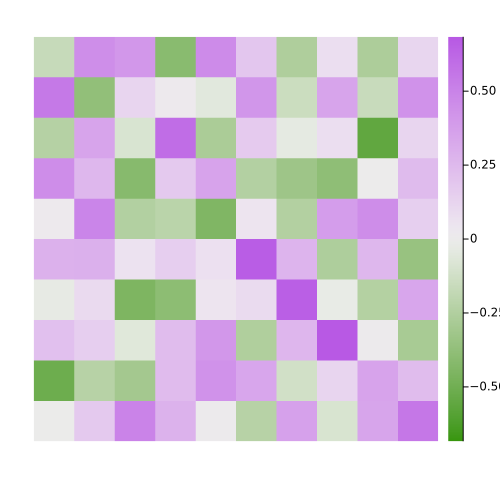

In [12]:
m = 10; n = 5;

A = randn(m, n)
Q, R = qr(A)
display(size(Q))
draw(imshow(Q))

(5, 5)

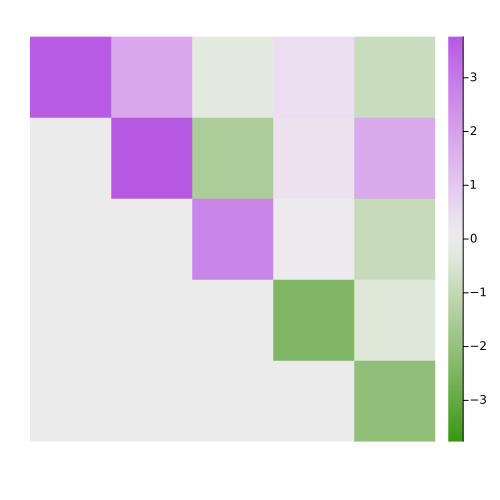

In [13]:
display(size(R))
draw(imshow(R))

### It appears to be a half-reduced / half-full QR factorization

... but we can multiply $Q$ and $\hat{R}$, even though the shapes don't match?

In [14]:
norm(A - Q * R, 2)

1.6083609177873814e-15

In fact we can multiply $Q$ by any matrix with $m$ rows _and_ any matrix with $n$ rows?

In [15]:
display(norm(Q * randn(10,7), 2))
display(norm(Q * randn(5,7), 2))

7.640703717324468

5.554446464860058

### julia `qr`'s `Q` is an object that can pretend to be $Q$ or $\hat{Q}$

In [16]:
typeof(Q)

LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}

- Extract the first $n$ columns if you need a plain matrix of $\hat{Q}$

In [17]:
typeof(Q[:,1:n])

Matrix{Float64} (alias for Array{Float64, 2})

- Extract all the columns if you need a plain matrix of $Q$

In [18]:
typeof(Q[:,:])

Matrix{Float64} (alias for Array{Float64, 2})

- If you only need to multiply by $Q$ or $Q^*$, just use `Q`.

### Notes on HW2, problem 2

- Each plane in 2D has a _normal vector_, orthogonal to every vector in the plane.
- So a line in the intersection of two planes is orthogonal to _both_ planes' normal vectors.
- This is a good, short program to get started with writing julia.

## QR by Projections

### Reminder of the original purpose: nested orthogonal bases of the nested column spaces of $A$ 

$$A = \hat{Q}\hat{R}, \quad A \in \mathbb{C}^{m \times n}\ (m \geq n), \quad \hat Q \in \mathbb{C}^{m \times n}\ (\hat Q^* \hat Q = I), \quad \hat R \in \mathbb{C}^{n \times n}\ (r_{ij} = 0, i > j).$$

$$\mathrm{span}\{q_1, \dots, q_j\} = \mathrm{span}\{a_1, \dots, a_j\}$$

For now suppose $A$ has rank $n$.

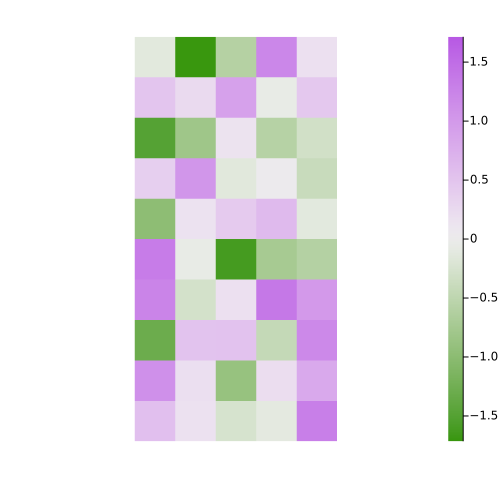

In [19]:
m = 10; n = 5;

A = randn(m, n);

draw(imshow(A))

### Base case: $j=1$

$$\mathrm{span}\{a_1\} = \mathrm{span}\{q_1\}$$

The first column of $A = \hat{Q} \hat{R}$ is

$$
a_1 = q_1 r_{11}
$$

Just set

$$q_1 = \frac{a_1}{\|a_1\|}, \quad r_{11} = \|a_1\| = q_1^* a_1$$

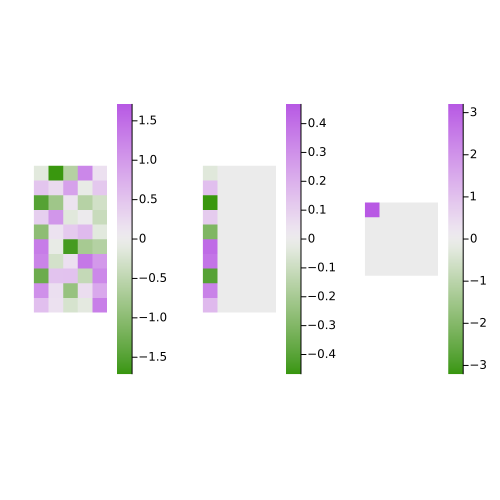

In [20]:
Q̂ = zeros(m, n); R̂ = zeros(n, n)

R̂[1,1] = norm(A[:,1])
Q̂[:,1] = A[:,1] / R̂[1,1]
draw(plot(imshow(A), imshow(Q̂), imshow(R̂), layout=(1,3)))

### Consider $j=2$

Have

$$\mathrm{span}\{q_1\} = \mathrm{span}\{a_1\},$$

want

$$\mathrm{span}\{q_1, q_2\} = \mathrm{span}\{a_1, a_2\}, \quad a_2 = r_{12} q_1 + r_{22} q_{22}.$$

Note that $$\mathrm{span}\{a_1, a_2\} = \mathrm{span}\{q_1, a_2\},$$ so we want

$$q_2 \in \mathrm{span}\{q_1, a_2\}, \quad q_2 \perp \mathrm{span}\{q_1\}.$$

### Project the $q_1$ component out of $a_2$ to create $q_2$

$$P_1 = q_1 q_1^*, \quad \tilde q_2 = (I - P_1) a_2.$$

But $\tilde q_2$ isn't unit length, so normalize it:

$$
q_2 = \frac{\tilde q_2}{\|\tilde q_2\|}.
$$

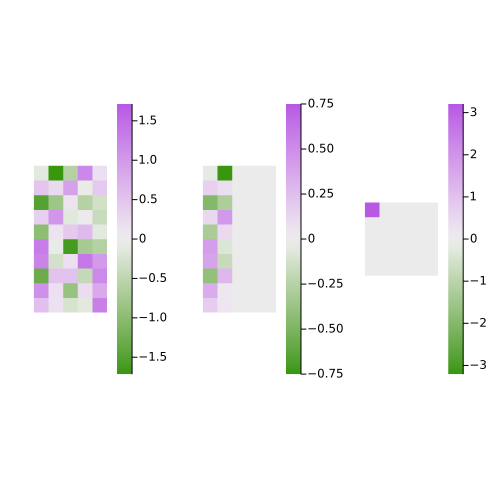

In [21]:
P1 = Q̂[:,1] * Q̂[:,1]'
Q̂[:,2] = (I - P1) * A[:,2]
Q̂[:,2] /= norm(Q̂[:,2])

draw(plot(imshow(A), imshow(Q̂), imshow(R̂), layout=(1,3)))

### Compute the second column of $\hat{R}$

Now we have an orthogonal projector onto $\mathrm{span}\{q_1, q_2\} = \mathrm{span}\{a_1, a_2\},$

$$P_{1:2} = \hat{Q}_{1:2} \hat{Q}_{1:2}^*.$$

Because $a_2 \in \mathrm{span}\{a_1, a_2\}$, 

$$a_2 = P_{1:2} a_2 = \hat{Q}_{1:2}\underbrace{\hat{Q}_{1:2}^* a_2}_{r_{1:2,2}}.$$

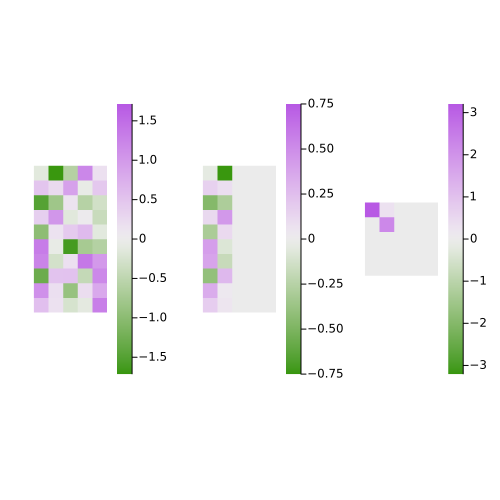

In [22]:
R̂[1:2,2] = Q̂[:,1:2]' * A[:,2]
draw(plot(imshow(A), imshow(Q̂), imshow(R̂), layout=(1,3)))

### General iteration $j$

Project the $q_1, \dots, q_{j-1}$ component out of $a_j$ and normalize:

$$
\tilde{q}_j = (I - P_{1:j-1}) a_j, \quad q_j = \frac{\tilde{q}_j}{\|\tilde{q}_j\|}
$$

The $j$th column of $\hat{R}$ is

$$
r_{1:j,j} = \hat Q_{1:j}^* a_j.
$$

### In action

(Left matrix: $A - \hat{Q} * \hat{R}$)

┌ Info: Saved animation to 
│   fn = /home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif
└ @ Plots /home/tisaac/.julia/packages/Plots/Xv2qA/src/animation.jl:114


Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif")
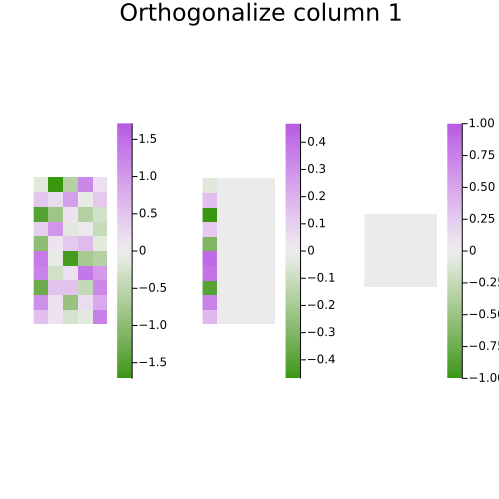

In [23]:
Q̂[:,:] .= 0.; R̂[:,:] .= 0.;
a = Animation()
for s in 1:2*n
    j = div(s + 1, 2)
    title = ""
    if mod(s, 2) == 1
        P = Q̂[:,1:j-1] * Q̂[:,1:j-1]'
        Q̂[:,j] = (I - P) * A[:,j]
        Q̂[:,j] /= norm(Q̂[:,j])
        title = "Orthogonalize column $j"
    else
        R̂[1:j,j] = Q̂[:,1:j]' * A[:,j]
        title = "Q̂ coefficients of column $j"
    end
    p = plot(imshow(A - Q̂ * R̂), imshow(Q̂), imshow(R̂), layout=(1,3), plot_title=title)
    frame(a, p)
end
gif(a, fps=0.5)

### For demonstration purposes only

Next time we will see practical implementations of this procedure